<a href="https://colab.research.google.com/github/JColeman1550/BRSSPIN/blob/main/Diekman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%pip install pybaseball

import pybaseball as pyb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 415 kB 5.5 MB/s 
     |████████████████████████████████| 291 kB 35.9 MB/s 
     |████████████████████████████████| 856 kB 13.8 MB/s 


In [2]:
help(pyb)

Help on package pybaseball:

NAME
    pybaseball

PACKAGE CONTENTS
    amateur_draft
    analysis (package)
    batting_leaders
    cache (package)
    datahelpers (package)
    datasources (package)
    enums (package)
    fielding_leaders
    lahman
    league_batting_stats
    league_pitching_stats
    pitching_leaders
    playerid_lookup
    plotting
    retrosheet
    split_stats
    standings
    statcast
    statcast_batter
    statcast_fielding
    statcast_pitcher
    statcast_pitcher_spin
    statcast_running
    team_batting
    team_fielding
    team_game_logs
    team_pitching
    team_results
    teamid_lookup
    top_prospects
    utils

FILE
    /usr/local/lib/python3.7/dist-packages/pybaseball/__init__.py




In [3]:
pyb.playerid_lookup('diekman', 'jake')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,diekman,jake,518617,diekj001,diekmja01,5003,2012.0,2021.0


In [5]:
diekman = pyb.statcast_pitcher('2012-01-01', '2021-10-31', 518617)

diekman.head(10)

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SL,2017-09-29,82.7,2.98,5.28,"Diekman, Jake",600524,518617,strikeout,swinging_strike_blocked,...,5,3,5,3,5,Standard,Standard,294.0,0.129,-0.646
1,FF,2017-09-29,97.2,3.01,5.38,"Diekman, Jake",600524,518617,NaN,ball,...,5,3,5,3,5,Standard,Standard,117.0,0.000,0.094
2,SL,2017-09-29,84.6,2.99,5.29,"Diekman, Jake",600524,518617,NaN,foul,...,5,3,5,3,5,Standard,Standard,295.0,0.000,0.000
3,SL,2017-09-29,82.2,3.07,5.30,"Diekman, Jake",600524,518617,NaN,swinging_strike,...,5,3,5,3,5,Standard,Standard,301.0,0.000,-0.203
4,FF,2017-09-29,97.4,2.88,5.37,"Diekman, Jake",600524,518617,NaN,swinging_strike,...,5,3,5,3,5,Standard,Standard,124.0,0.000,-0.119
5,FF,2017-09-29,96.0,2.72,5.33,"Diekman, Jake",600524,518617,NaN,ball,...,5,3,5,3,5,Standard,Standard,129.0,0.000,0.130
6,FF,2017-09-29,97.6,2.93,5.22,"Diekman, Jake",592387,518617,walk,ball,...,5,3,5,3,5,Standard,Standard,117.0,-0.056,0.095
7,FF,2017-09-29,96.8,2.77,5.34,"Diekman, Jake",592387,518617,NaN,called_strike,...,5,3,5,3,5,Standard,Standard,131.0,0.000,-0.043
8,SI,2017-09-29,97.2,2.90,5.34,"Diekman, Jake",592387,518617,NaN,ball,...,5,3,5,3,5,Standard,Standard,101.0,0.000,0.144
9,SL,2017-09-29,82.4,3.11,5.30,"Diekman, Jake",592387,518617,NaN,ball,...,5,3,5,3,5,Standard,Standard,281.0,0.000,0.028


In [6]:
diekman['year'] = diekman['game_date'].str[:4]

diekman_starts = diekman.loc[~diekman['pitch_type'].isna()]

diekman_seasons = diekman_starts.groupby(['year','pitch_name']).agg({
    'player_name': 'size',
    'release_speed': 'mean',
    'release_spin_rate': 'mean'
})

diekman_seasons = diekman_seasons.reset_index()

pitch_count = diekman_seasons.groupby('year').sum().reset_index()

pitch_count = pitch_count.loc[:,['year', 'player_name']]

diekman_seasons = diekman_seasons.merge(pitch_count,on='year')

diekman_seasons['percent_thrown'] = diekman_seasons['player_name_x']/diekman_seasons['player_name_y']

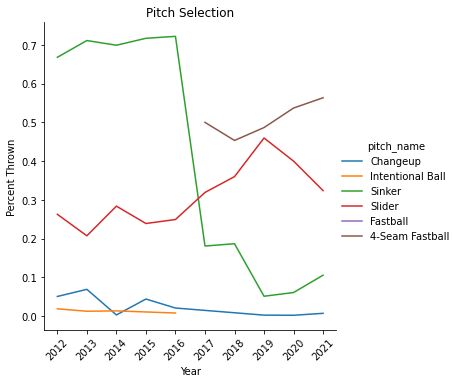

In [7]:
ax = sns.relplot(data=diekman_seasons, x='year', y='percent_thrown',kind='line', hue='pitch_name')

ax.set_xticklabels(rotation=45)

ax.set(ylabel='Percent Thrown', xlabel='Year', title ='Pitch Selection');

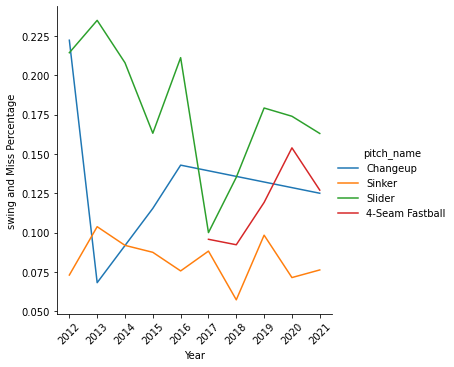

In [9]:
strikes = diekman_starts.loc[diekman_starts['description'] == 'swinging_strike']

strikes = strikes.groupby(['year','pitch_name']).count()

strikes = strikes.reset_index()

strikes = strikes.loc[:,['year','pitch_name','player_name','pitch_type']]

total_pitches = diekman_seasons.loc[:,['year','pitch_name','player_name_x']]

strikes = strikes.merge(total_pitches,on=['year','pitch_name'])

strikes['swing_and_miss_percent'] = strikes['pitch_type'] / strikes['player_name_x']

ax = sns.relplot(data=strikes,x='year',y='swing_and_miss_percent',kind='line',hue='pitch_name')

ax.set_xticklabels(rotation=45)

ax.set(ylabel='swing and Miss Percentage', xlabel='Year')

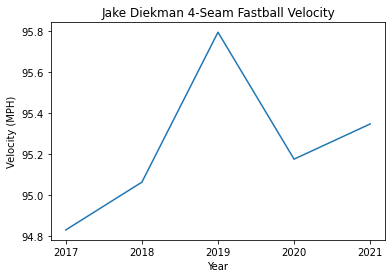

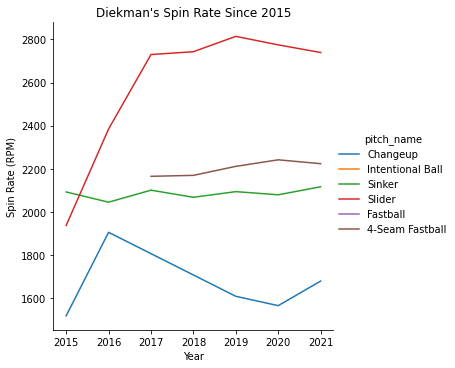

In [11]:
four_seam_fastball = diekman_seasons.loc[diekman_seasons['pitch_name'].str.contains('4-Seam Fastball')]

plt.plot(four_seam_fastball['year'], four_seam_fastball['release_speed'])
plt.xlabel('Year')
plt.ylabel('Velocity (MPH)')
plt.title('Jake Diekman 4-Seam Fastball Velocity')

ax = sns.relplot(data=diekman_seasons, x='year', y='release_spin_rate', kind='line', hue='pitch_name')
ax.set(ylabel='Spin Rate (RPM)', xlabel='Year', title="Diekman's Spin Rate Since 2015")